In [ ]:
# import numpy as np
# import pandas as pd
# import nltk
# from nltk.corpus import reuters
# from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# %matplotlib inline

# # Для работы с предобученными языковыми моделями
# from sentence_transformers import SentenceTransformer

In [ ]:
# nltk.download('reuters')
# nltk.download('punkt')

# # Получим список файлов (документов) из корпуса
# documents = reuters.fileids()

In [ ]:
# train_docs_id = list(filter(lambda doc: doc.startswith("train"), documents))
# test_docs_id = list(filter(lambda doc: doc.startswith("test"), documents))

# train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]
# test_docs = [reuters.raw(doc_id) for doc_id in test_docs_id]

# # Объединим данные для простоты дальнейшей обработки:
# all_docs = train_docs + test_docs

In [ ]:
# pip install numpy pandas nltk scikit-learn sentence-transformers matplotlib

In [1]:
!pip install -U spacy
!python -m spacy download ru_core_news_sm
!pip install gensim
!pip install -U sentence-transformers
!pip install --upgrade numpy
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 124.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 99.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.4/483.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

## 1. Препроцессинг данных

In [1]:
# Наши тексты для анализа
documents = [
    "Мама мыла раму и окно.",
    "Отец читал газету в кресле.",
    "Собака лает на прохожих.",
    "Кошка спит на подоконнике.",
    "Дети играют в футбол на стадионе.",
    "Мама готовит вкусный ужин.",
    "Отец ремонтирует автомобиль в гараже.",
    "Птицы поют на рассвете.",
    "Дети смотрят мультфильмы по телевизору.",
    "Собака и кошка дружат между собой."
]


In [2]:
import spacy

# Загружаем модель русского языка
nlp = spacy.load('ru_core_news_sm')

# Функция для лемматизации текста
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
    return ' '.join(tokens)

# Применяем предобработку к нашим текстам
processed_documents = [preprocess(doc) for doc in documents]

In [5]:
processed_documents

['мама мыла рама окно',
 'отец читать газета кресло',
 'собака лаять прохожий',
 'кошка спать подоконник',
 'ребёнок играть футбол стадион',
 'мама готовить вкусный ужин',
 'отец ремонтировать автомобиль гараж',
 'птица петь рассвет',
 'ребёнок смотреть мультфильм телевизор',
 'собака кошка дружат']

In [4]:
# Применим TF-IDF векторизацию для преобразования текстов в числовой формат
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_documents)

In [3]:
# Используем предобученные модели Word2Vec для преобразования слов в эмбединги

import gensim.downloader as api
from gensim.models import Word2Vec

# Загружаем предобученную модель для русского языка
model = api.load("word2vec-ruscorpora-300")  # может занять некоторое время

# Функция для получения среднего вектора документа
import numpy as np


[==================================================] 100.0% 198.8/198.8MB downloaded


In [7]:
def preprocess_for_w2v(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if not token.is_punct and not token.is_stop]
    return tokens

wv_documents = [preprocess_for_w2v(doc) for doc in documents]

def document_vector(doc):
    unknown_words = [word for word in doc if word not in model.key_to_index]
    if unknown_words:
        print(f"Неизвестные слова: {unknown_words}")
    doc = [word for word in doc if word in model.key_to_index]
    if len(doc) > 0:
        return np.mean([model[word] for word in doc], axis=0)
    else:
        return np.zeros(model.vector_size)


# Преобразуем наши документы в векторы
wv_vectors = np.array([document_vector(doc) for doc in wv_documents])


Неизвестные слова: ['мама', 'мыла', 'раму', 'окно']
Неизвестные слова: ['отец', 'читал', 'газету', 'кресле']
Неизвестные слова: ['собака', 'лает', 'прохожих']
Неизвестные слова: ['кошка', 'спит', 'подоконнике']
Неизвестные слова: ['дети', 'играют', 'футбол', 'стадионе']
Неизвестные слова: ['мама', 'готовит', 'вкусный', 'ужин']
Неизвестные слова: ['отец', 'ремонтирует', 'автомобиль', 'гараже']
Неизвестные слова: ['птицы', 'поют', 'рассвете']
Неизвестные слова: ['дети', 'смотрят', 'мультфильмы', 'телевизору']
Неизвестные слова: ['собака', 'кошка', 'дружат']


In [5]:
# Используем трансформеры для преобразования слов в эмбединги
from sentence_transformers import SentenceTransformer

# Загружаем модель для русского языка
model_name = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
sbert_model = SentenceTransformer(model_name)

# Преобразуем документы в эмбеддинги
sbert_embeddings = sbert_model.encode(documents)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


## 2. Сравнение текстов и поиск похожих

### Поиск похожих текстов с использованием косинусного сходства


In [8]:
# Для каждой пары документов вычислим косинусное сходство.

from sklearn.metrics.pairwise import cosine_similarity

# Для TF-IDF
tfidf_cosine_sim = cosine_similarity(tfidf_matrix)

# Для Word2Vec
wv_cosine_sim = cosine_similarity(wv_vectors)

# Для Sentence BERT
sbert_cosine_sim = cosine_similarity(sbert_embeddings)

In [9]:
import pandas as pd

def print_similar_docs(similarity_matrix, method_name):
    print(f"===================================================")
    print(f"Наиболее похожие документы по методу {method_name}:\n")
    print(f"===================================================")
    for idx, row in enumerate(similarity_matrix):
        similar_indices = row.argsort()[::-1][1:3]  # Индексы двух самых похожих (кроме самого себя)
        print(f"Документ: {documents[idx]}")
        print(f"Похож на: {documents[similar_indices[0]]} (сходство: {row[similar_indices[0]]:.2f})")
        print(f"И на: {documents[similar_indices[1]]} (сходство: {row[similar_indices[1]]:.2f})\n")

print_similar_docs(tfidf_cosine_sim, "TF-IDF")
print_similar_docs(wv_cosine_sim, "Word2Vec")
print_similar_docs(sbert_cosine_sim, "Sentence-BERT")

Наиболее похожие документы по методу TF-IDF:

Документ: Мама мыла раму и окно.
Похож на: Мама готовит вкусный ужин. (сходство: 0.19)
И на: Собака и кошка дружат между собой. (сходство: 0.00)

Документ: Отец читал газету в кресле.
Похож на: Отец ремонтирует автомобиль в гараже. (сходство: 0.19)
И на: Собака и кошка дружат между собой. (сходство: 0.00)

Документ: Собака лает на прохожих.
Похож на: Собака и кошка дружат между собой. (сходство: 0.28)
И на: Дети смотрят мультфильмы по телевизору. (сходство: 0.00)

Документ: Кошка спит на подоконнике.
Похож на: Собака и кошка дружат между собой. (сходство: 0.28)
И на: Дети смотрят мультфильмы по телевизору. (сходство: 0.00)

Документ: Дети играют в футбол на стадионе.
Похож на: Дети смотрят мультфильмы по телевизору. (сходство: 0.19)
И на: Собака и кошка дружат между собой. (сходство: 0.00)

Документ: Мама готовит вкусный ужин.
Похож на: Мама мыла раму и окно. (сходство: 0.19)
И на: Собака и кошка дружат между собой. (сходство: 0.00)

Докуме

## 3. Кластеризация документов

### 3.1. K-Means кластеризация

In [10]:
from sklearn.cluster import KMeans

# Выберем число кластеров (например, 3)
n_clusters = 3

# Для TF-IDF
kmeans_tfidf = KMeans(n_clusters=n_clusters, random_state=0).fit(tfidf_matrix)

# Для Word2Vec
kmeans_wv = KMeans(n_clusters=n_clusters, random_state=0).fit(wv_vectors)

# Для Sentence-BERT
kmeans_sbert = KMeans(n_clusters=n_clusters, random_state=0).fit(sbert_embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


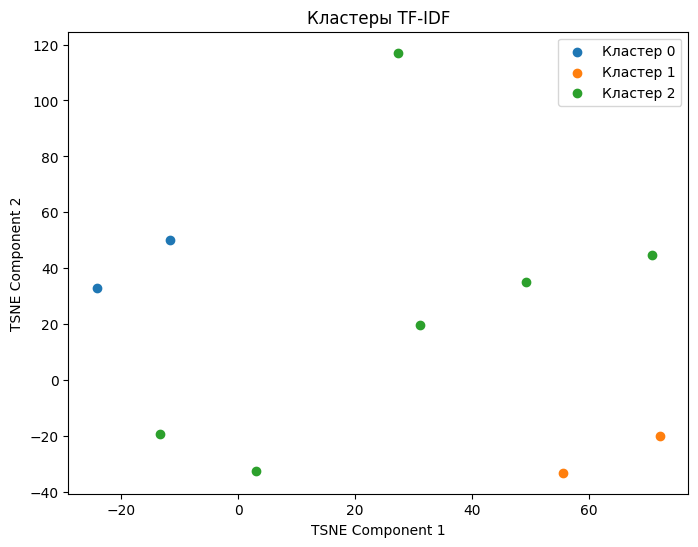

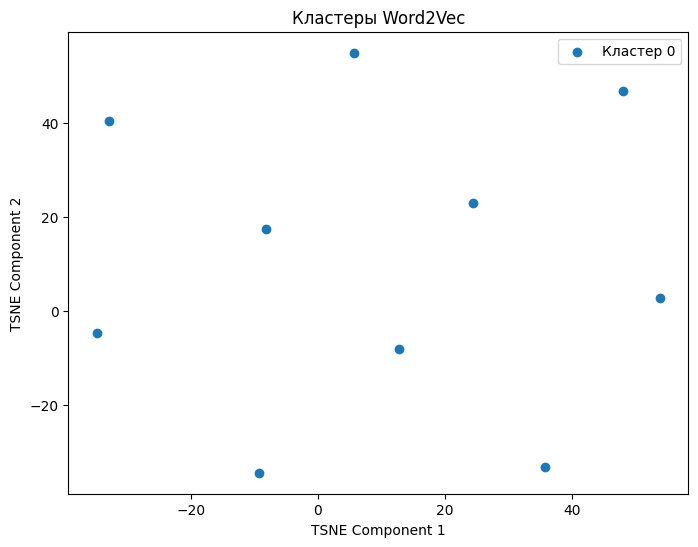

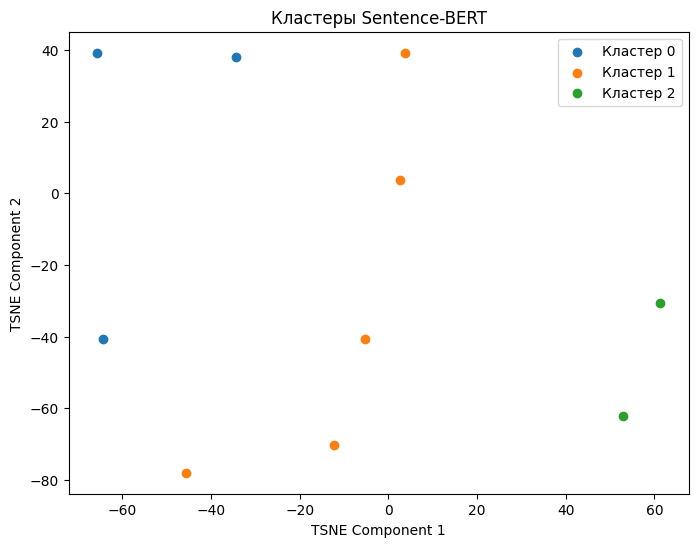

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_clusters(embeddings, labels, title, perplexity=5):
    # Установка init='random' для поддержки разреженных матриц
    tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity, init='random')
    reduced_embeddings = tsne.fit_transform(embeddings.toarray() if hasattr(embeddings, "toarray") else embeddings)

    plt.figure(figsize=(8, 6))

    unique_labels = set(labels)
    n_clusters = len(unique_labels)

    for i in unique_labels:
        cluster_points = reduced_embeddings[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Кластер {i}")

    plt.legend()
    plt.title(title)
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()

# Визуализация для каждого подхода
plot_clusters(tfidf_matrix, kmeans_tfidf.labels_, "Кластеры TF-IDF")
plot_clusters(wv_vectors, kmeans_wv.labels_, "Кластеры Word2Vec", perplexity=5)
plot_clusters(sbert_embeddings, kmeans_sbert.labels_, "Кластеры Sentence-BERT", perplexity=5)

In [14]:
# интерактивная визуализация
import plotly.express as px
import pandas as pd
import scipy
from sklearn.manifold import TSNE

def plot_clusters_interactive(embeddings, labels, title, perplexity=None):
    if scipy.sparse.issparse(embeddings):
        embeddings = embeddings.toarray()

    n_samples = embeddings.shape[0]

    # Автоматический выбор perplexity, если не задан
    if perplexity is None:
        # Обычно perplexity должно быть < n_samples, минимум 5
        perplexity = min(30, n_samples - 1) if n_samples > 1 else 1
    else:
        # Убедимся, что perplexity меньше n_samples
        if perplexity >= n_samples:
            raise ValueError(f"perplexity ({perplexity}) must be less than n_samples ({n_samples})")
        if perplexity < 1:
            raise ValueError("perplexity must be at least 1")

    print(f"Используем perplexity={perplexity} при количестве образцов={n_samples}")

    tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
    reduced_embeddings = tsne.fit_transform(embeddings)

    df = pd.DataFrame({
        'TSNE1': reduced_embeddings[:, 0],
        'TSNE2': reduced_embeddings[:, 1],
        'Cluster': labels
    })

    fig = px.scatter(df, x='TSNE1', y='TSNE2', color='Cluster', title=title)  # color='Cluster'
    fig.show()


In [15]:
# Визуализация для каждого подхода
plot_clusters_interactive(tfidf_matrix, kmeans_tfidf.labels_, "Кластеры TF-IDF", perplexity=5) # странная визуализация, подумать, как исправить
#plot_clusters_interactive(wv_vectors, kmeans_wv.labels_, "Кластеры Word2Vec", perplexity=5)
plot_clusters_interactive(sbert_embeddings, kmeans_sbert.labels_, "Кластеры Sentence-BERT", perplexity=5)


Используем perplexity=5 при количестве образцов=10


Используем perplexity=5 при количестве образцов=10


In [16]:
# print(f"Количество образцов в sbert_embeddings: {sbert_embeddings.shape[0]}")
# print(f"Количество меток в kmeans_sbert.labels_: {len(kmeans_sbert.labels_)}")

from sklearn.metrics import silhouette_score

# Расчёт коэффициента силуэта для каждого подхода
silhouette_tfidf = silhouette_score(tfidf_matrix, kmeans_tfidf.labels_)
#silhouette_wv = silhouette_score(wv_vectors, kmeans_wv.labels_)
silhouette_sbert = silhouette_score(sbert_embeddings, kmeans_sbert.labels_)


print(f"Силуэт для TF-IDF: {silhouette_tfidf:.2f}")
#print(f"Силуэт для Word2Vec: {silhouette_wv:.2f}")
print(f"Силуэт для Sentence-BERT: {silhouette_sbert:.2f}")


Силуэт для TF-IDF: 0.06
Силуэт для Sentence-BERT: 0.07


In [17]:
## 7. Классификация текстов

# Зададим метки классов (например, "семья", "животные", "дети")
labels = [0, 0, 1, 1, 2, 0, 0, 1, 2, 1]
label_names = {0: "Семья", 1: "Животные", 2: "Дети"}
### 7.1. Разделение данных на обучение и тест

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.3, random_state=42)
### 7.2. Обучение классификатора

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
### 7.3. Оценка модели

from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_names.values()))



              precision    recall  f1-score   support

       Семья       0.00      0.00      0.00       2.0
    Животные       0.00      0.00      0.00       0.0
        Дети       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-p

In [18]:

## 8. Обучение без учителя

### 8.1. Тематическое моделирование с LDA


from sklearn.decomposition import LatentDirichletAllocation

n_topics = 3

lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Выводим топ-слова для каждой темы
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Тема {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Тема 0:
кошка отец дружат подоконник спать собака автомобиль гараж ремонтировать газета
Тема 1:
лаять прохожий рассвет птица петь собака стадион играть футбол ребёнок
Тема 2:
мыла рама окно телевизор смотреть мультфильм мама ребёнок собака ужин


In [ ]:
list(label_names.values())[1]

'Животные'

In [19]:
# 7. Классификация текстов

## 7.0. Подготовка данных

# Расширенный корпус текстов с равным количеством примеров для каждого класса
texts = [
    # Семья
    "Мама и папа любят проводить время с семьей",
    "Бабушка печет вкусные пироги для всей семьи",
    "Семейный ужин собирает всех вместе",
    "Папа учит сына играть в футбол",
    "Мама рассказывает сказку всей семье",
    "Родители планируют семейный отпуск на море",
    # Животные
    "Собака лает на незнакомцев в парке",
    "Кошка спит на солнечном подоконнике весь день",
    "Львы и тигры являются хищными животными",
    "Птицы поют красивые песни по утрам",
    "Белка собирает орехи в лесу",
    "Дельфины прыгают над волнами в океане",
    # Дети
    "Дети играют в детском саду с друзьями",
    "Малыш учится ходить и говорить",
    "Ребенок рисует картину для мамы",
    "Школьники делают домашнее задание вместе",
    "Дети любят кататься на каруселях",
    "Мальчик читает интересную книгу перед сном",
]

# Соответствующие метки классов (0: Семья, 1: Животные, 2: Дети)
labels = [
    0, 0, 0, 0, 0, 0,  # Семья
    1, 1, 1, 1, 1, 1,  # Животные
    2, 2, 2, 2, 2, 2   # Дети
]
label_names = {0: "Семья", 1: "Животные", 2: "Дети"}

## 7.0.1 Преобразование текстов в числовое представление

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

## 7.1. Разделение данных на обучение и тестирование

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, labels, test_size=0.3, random_state=42, stratify=labels
)

## 7.2. Обучение классификатора

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

## 7.3. Оценка модели

from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_names.values()))


              precision    recall  f1-score   support

       Семья       0.50      1.00      0.67         2
    Животные       0.00      0.00      0.00         2
        Дети       0.50      0.50      0.50         2

    accuracy                           0.50         6
   macro avg       0.33      0.50      0.39         6
weighted avg       0.33      0.50      0.39         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [20]:
# 8. Обучение без учителя

## 8.1. Тематическое моделирование с LDA

from sklearn.decomposition import LatentDirichletAllocation

n_topics = 3  # Число тем равно количеству классов

lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Вывод топ-слов для каждой темы
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nТема {topic_idx + 1} {list(label_names.values())[topic_idx]}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


Тема 1 Семья:
семейный, на, всех, ужин, лает, собака, парке, незнакомцев, саду, детском

Тема 2 Животные:
кататься, каруселях, семье, сказку, рассказывает, любят, дети, мама, всей, поют

Тема 3 Дети:
папа, орехи, белка, лесу, ходить, учится, говорить, малыш, играть, футбол
